Evaluation Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.60        22
           1       0.47      0.39      0.42        18

    accuracy                           0.53        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.52      0.53      0.52        40



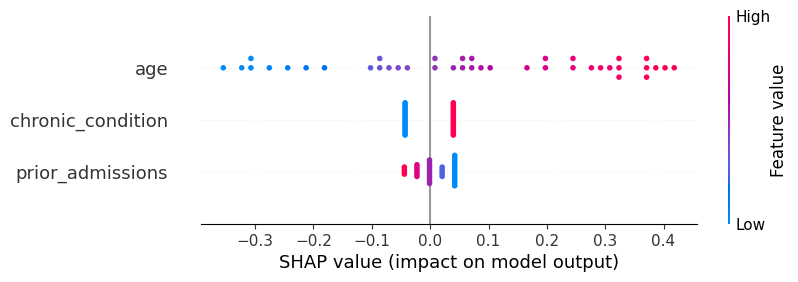

"\nfrom aif360.datasets import StandardDataset\nfrom aif360.algorithms.preprocessing import Reweighing\n\n# Convert DataFrame to AIF360-compatible format\naif_dataset = StandardDataset(df,\n    label_name='readmitted',\n    protected_attribute_names=['ethnicity'],\n    favorable_classes=[0],\n    unfavorable_classes=[1])\n\n# Apply reweighing\nreweigher = Reweighing(unprivileged_groups=[{'ethnicity': 1}],\n                       privileged_groups=[{'ethnicity': 0}])\naif_dataset_transformed = reweigher.fit_transform(aif_dataset)\n"

In [2]:


# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt

# Optional: Uncomment if running locally
# !pip install aif360 shap matplotlib scikit-learn

# 📊 Step 2: Create sample dataset (replace with real hospital data)
np.random.seed(42)
df = pd.DataFrame({
    'age': np.random.randint(30, 80, 200),
    'prior_admissions': np.random.randint(0, 5, 200),
    'chronic_condition': np.random.randint(0, 2, 200),
    'ethnicity': np.random.randint(0, 2, 200),  # 0 = privileged, 1 = unprivileged
    'readmitted': np.random.randint(0, 2, 200)
})

X = df[['age', 'prior_admissions', 'chronic_condition']]
y = df['readmitted']

# 🧪 Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# 🤖 Step 4: Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📈 Step 5: Classification report
print("Evaluation Report:\n", classification_report(y_test, y_pred))

# 🔎 Step 6: SHAP Explainability
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP values
shap.plots.beeswarm(shap_values)

# 📊 Step 7: Fairness-Aware Reweighing (using AIF360)
# Uncomment when AIF360 is installed
"""
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing

# Convert DataFrame to AIF360-compatible format
aif_dataset = StandardDataset(df,
    label_name='readmitted',
    protected_attribute_names=['ethnicity'],
    favorable_classes=[0],
    unfavorable_classes=[1])

# Apply reweighing
reweigher = Reweighing(unprivileged_groups=[{'ethnicity': 1}],
                       privileged_groups=[{'ethnicity': 0}])
aif_dataset_transformed = reweigher.fit_transform(aif_dataset)
"""

# ✅ Notes:
# - Use fairness metrics like Disparate Impact, Equal Opportunity
# - Integrate this into your model development or monitoring pipeline
